In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns


%matplotlib inline

FIG_WIDTH=20
FIG_HEIGTH=8

In [16]:
resources = pandas.read_csv('performance.csv')

ignored_terms = ['xvt',  # rare
                 'eterm',  # too old
                 'kterm',  # too old
                 'mrxvt',  # mostly like rxvt
                 'xfce4-terminal',  # like gnome-terminal
                 'xfce4',  # synonym
                 'terminator',  # synonym
                 'Terminator']  # like gnome-terminal
for terminal in ignored_terms:
    resources = resources[resources.terminal != terminal]  # rare
resources = resources.sort_values(by='time (s)')
resources.sort_values(by='time (s)')
resources.describe()

,time (s),cpu (%),memory (k)
count,8.000000,8.000000,8.00000
mean,9.310000,52.000000,1899.50000
std,8.587186,34.739849,71.60008
min,2.520000,13.000000,1800.00000
25%,3.060000,26.000000,1863.00000
50%,6.110000,43.000000,1884.00000
75%,11.477500,83.000000,1954.00000
max,26.050000,99.000000,2000.00000


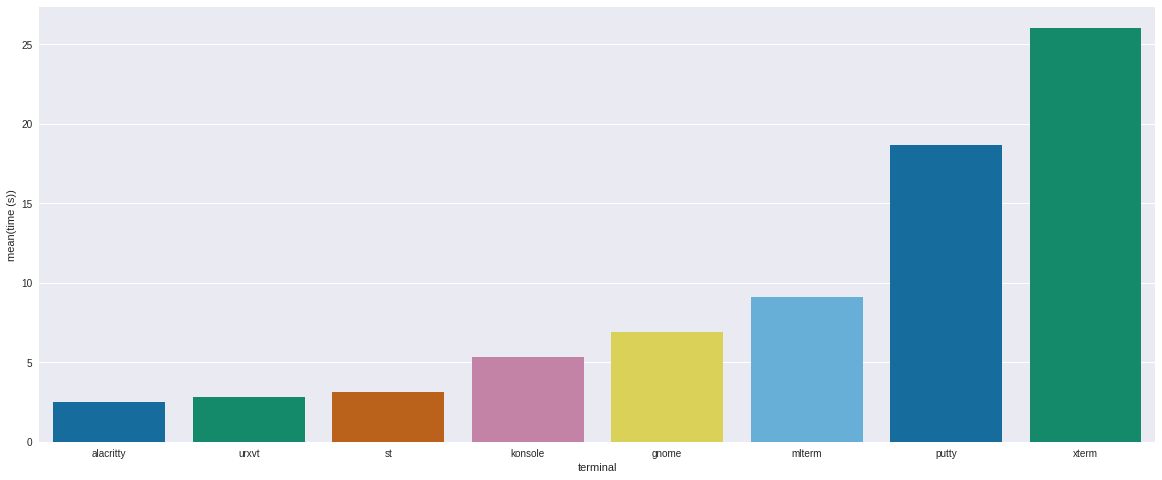

In [17]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

sns.barplot(data=resources, x='terminal', y='time (s)', palette='colorblind')
#g = sns.PairGrid(resources,
#                 x_vars='terminal',
#                 y_vars=['time (s)', 'cpu (%)', 'memory (k)'])
#g.map(sns.barplot, palette="colorblind")
#g.fig.set_figwidth(FIG_WIDTH)
#g.fig.set_figheight(FIG_HEIGTH)

In [18]:
latency = pandas.read_csv('latency-all.csv')

for terminal in []:  # use ignored_terms to skip the same as above
    try:
        latency.drop(terminal, axis=1, inplace=True)
    except ValueError:
        pass
latency.describe()

,xterm,mlterm,kterm,mrxvt,xvt,konsole,urxvt,st,alacritty,putty,xfce4,gnome,terminator
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000
mean,9.559500,10.046650,10.391600,13.61730,13.940750,19.579500,23.472000,23.825700,24.186400,27.75480,31.929900,32.47470,32.686600
std,3.610077,3.980015,4.078467,4.09194,3.654527,3.006935,1.890329,1.943724,6.140052,1.93073,1.706501,1.71692,1.516362
min,3.030000,3.750000,2.210000,3.95000,7.540000,13.750000,19.220000,15.990000,8.280000,23.64000,28.160000,28.26000,28.720000
25%,5.647500,5.407500,5.487500,11.93750,11.067500,16.750000,22.272500,22.817500,22.562500,25.88750,30.907500,31.43250,31.742500
50%,9.460000,11.820000,12.605000,13.42500,12.915000,20.410000,23.670000,23.800000,26.045000,28.09500,31.830000,32.64500,32.850000
75%,13.162500,13.740000,13.980000,17.12750,17.895000,21.780000,25.005000,25.372500,28.485000,29.23000,33.235000,33.71500,33.572500
max,15.040000,15.240000,17.940000,21.63000,21.090000,28.350000,27.010000,29.170000,32.330000,31.65000,36.080000,36.79000,38.790000


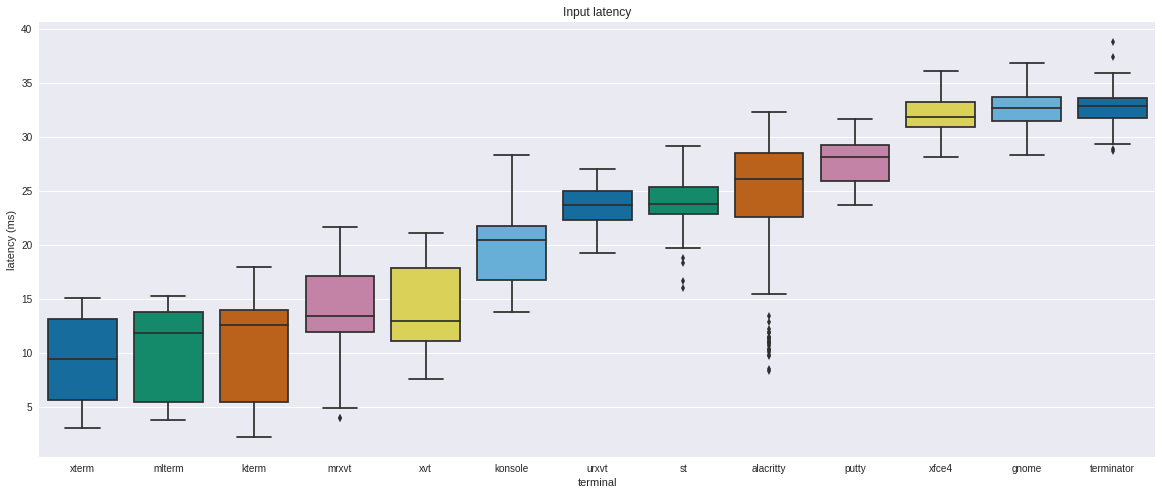

In [10]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

In [13]:
data = pandas.read_csv('times-100x100000.csv')
data.describe()

,time,cpu,memory
count,806.000000,806.000000,806.000000
mean,1.105881,138.888337,30745.334988
std,0.787527,25.121764,15464.080042
min,0.110000,47.000000,8324.000000
25%,0.480000,115.000000,22958.000000
50%,0.870000,127.500000,30642.000000
75%,1.970000,164.000000,48852.000000
max,3.210000,179.000000,55664.000000


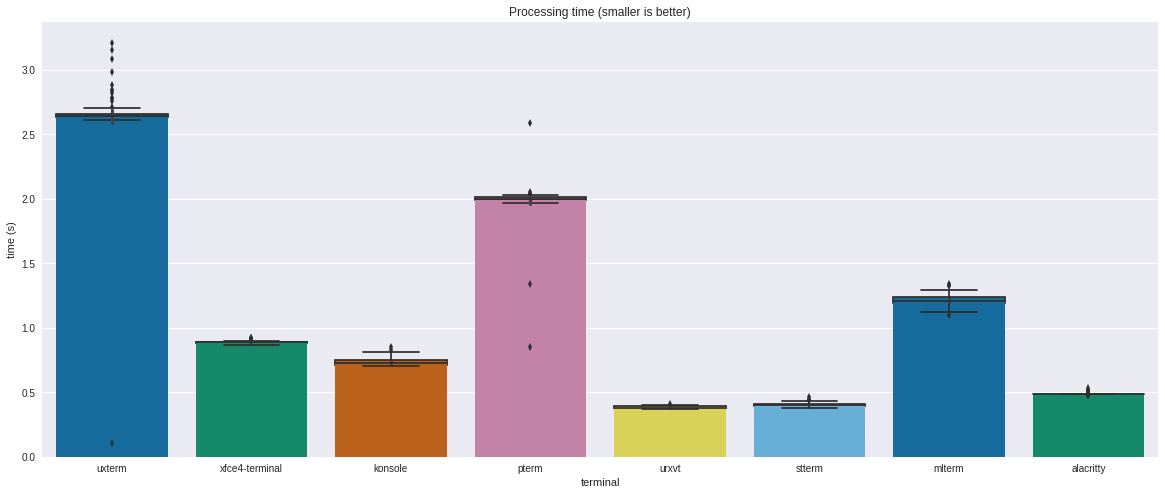

In [5]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

# lots of outliers in xterm, some in pterm, but others have too little variability
ax = sns.boxplot(data=data, x='terminal', y='time', palette='colorblind')
ax = sns.barplot(data=data, x='terminal', y='time', palette='colorblind')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (s)')

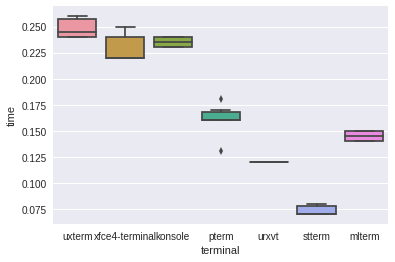

In [6]:
small = pandas.read_csv('times-10x10000.csv')
ax = sns.boxplot(data=small, x='terminal', y='time')

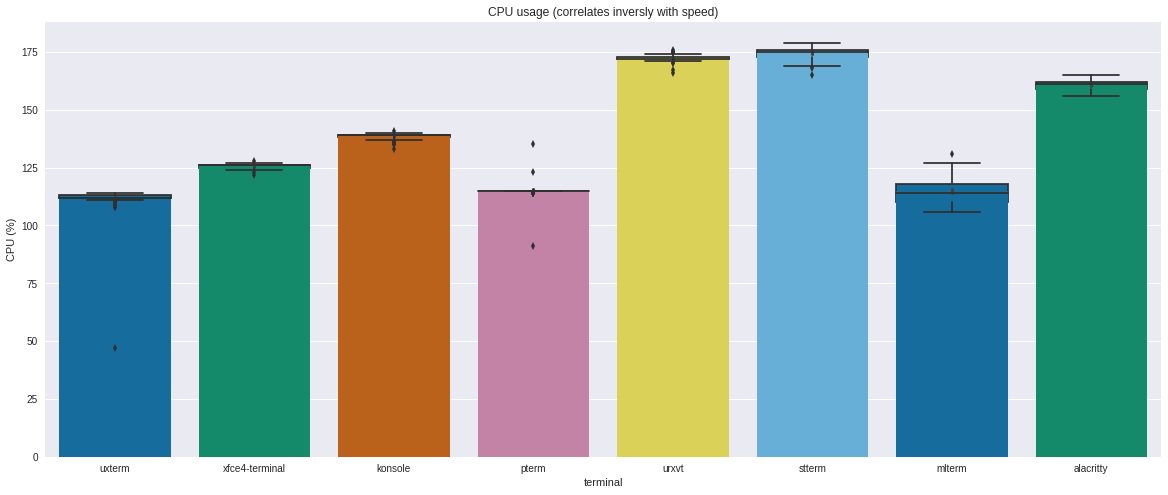

In [7]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='cpu', palette='colorblind')
ax = sns.boxplot(data=data, x='terminal', y='cpu', palette='colorblind')
ax.set_title('CPU usage (correlates inversly with speed)')
ax.set_ylabel('CPU (%)')

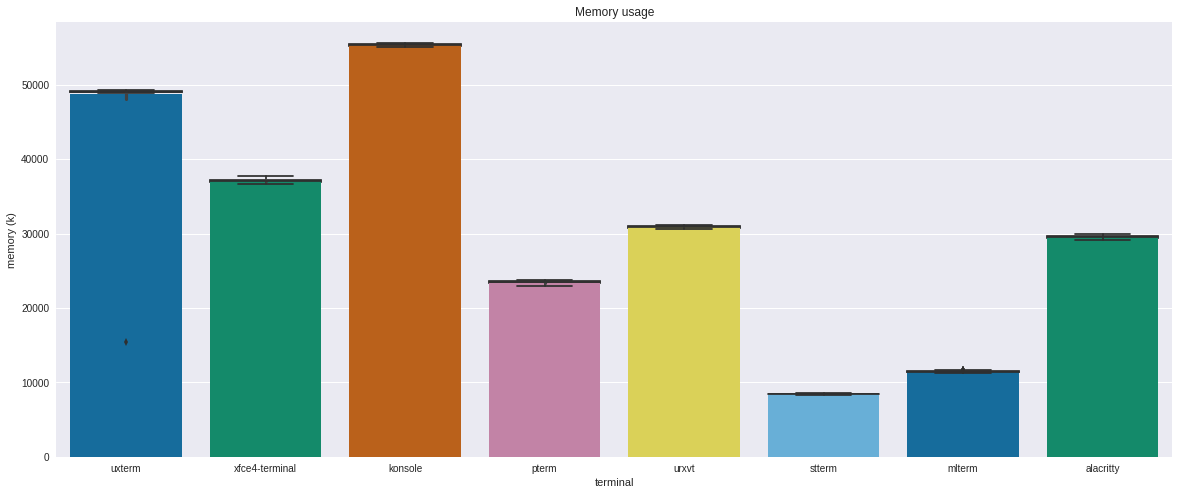

In [11]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

# no visible variability, apart from an outlier in xterm
ax = sns.boxplot(data=data, x='terminal', y='memory', palette='colorblind')
ax = sns.barplot(data=data, x='terminal', y='memory', palette='colorblind')
ax.set_title('Memory usage')
ax.set_ylabel('memory (k)')
